**Problem 1: Adding a Color Patch to an Image.**

This problem requires placing a blue rectangle at the center of the image tf2_engineer.jpg. 

The steps involve:
1.Loading the image
2.Locating its center coordinates
3.Drawing the patch
4.Verifying the result

**Required Libraries:**

1.cv2 (OpenCV): Handles image loading and manipulation.

2.matplotlib: Displays the image in Jupyter Notebook.

3.numpy:used with OpenCV for array operations.

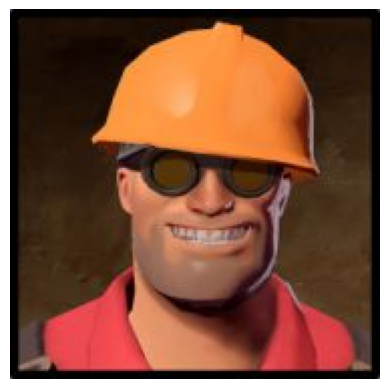

In [3]:
# 1.i import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# 2. loading the image
img = cv2.imread('tf2_engineer.jpg')  

# 3. Converting BGR to RGB (for OpenCV to loads images as BGR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 4.  to display the image using function:
plt.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()

**Steps: Adding a Color Patch**

This code will add a blue-green rectangle to the center of the image and verifies the result by:


1.Loading the image using BGR format in OpenCV

2.Displays the original image after converting to RGB for proper matplotlib display

3.Calculates the center point of the image using its dimensions

4.Draws a rectangle at the center with specified dimensions and color

5.Overwrites pixels in the rectangle area to ensure complete coverage (a common debugging technique

6.Verifies the result by checking the color value at the center pixel

7.Displays the final image with the color patch

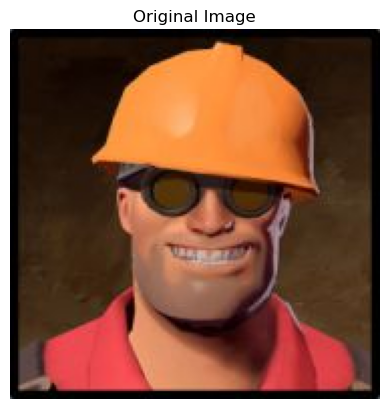

Center (y,x): (92, 92)
Original BGR: [67, 92, 172]
Final BGR (must be [168,158,50]): [168, 158, 50]


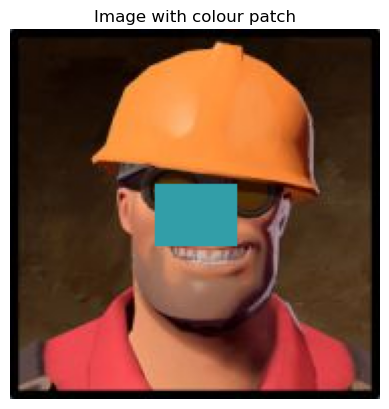

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Loading image in BGR mode
img = cv2.imread('tf2_engineer.jpg', cv2.IMREAD_COLOR)

# 2. Show original image first
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# 3. Calculate center of image
yc, xc = img.shape[0]//2, img.shape[1]//2
print(f"Center (y,x): ({yc}, {xc})")
print(f"Original BGR: {img[yc, xc].tolist()}")

# 4. Draw rectangle
cv2.rectangle(img, (xc-20, yc-15), (xc+20, yc+15), (168,158,50), -1)

# 5. OVERWRITE PIXEL AREA (nuclear option)
img[yc-15:yc+15, xc-20:xc+20] = [168, 158, 50]

# 6. finalize the BGR
print(f"Final BGR (must be [168,158,50]): {img[yc, xc].tolist()}")

# 7. Display the image with the color in center
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Image with colour patch")
plt.axis('off')
plt.show()


**Problem 2: Image Negatives**

Using the image einstein.tif, we will:

1.Read and display the grayscale image.
2.Create and display its negative version.
3.Compare pixel values between original and negative for 5 random locations.

Original Image:


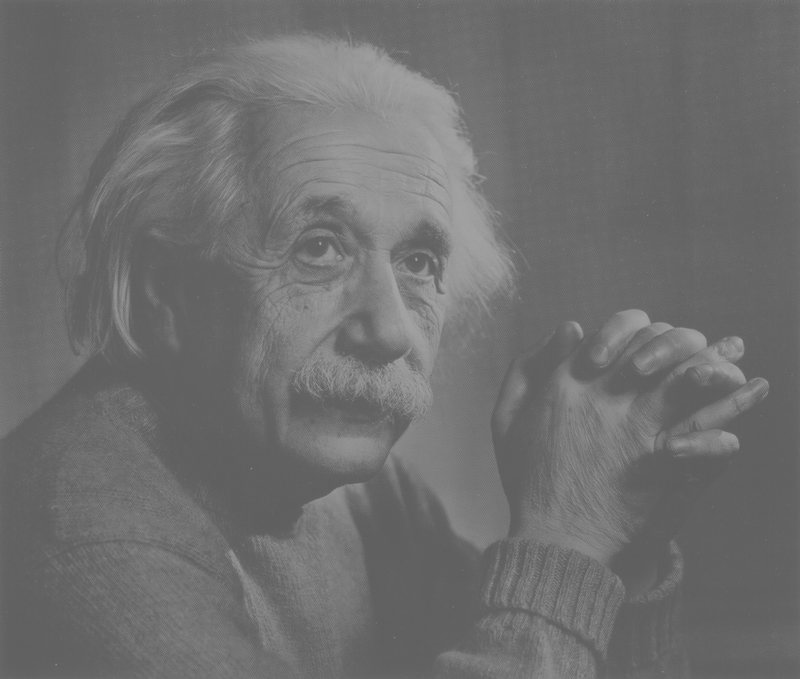


Negative Image:


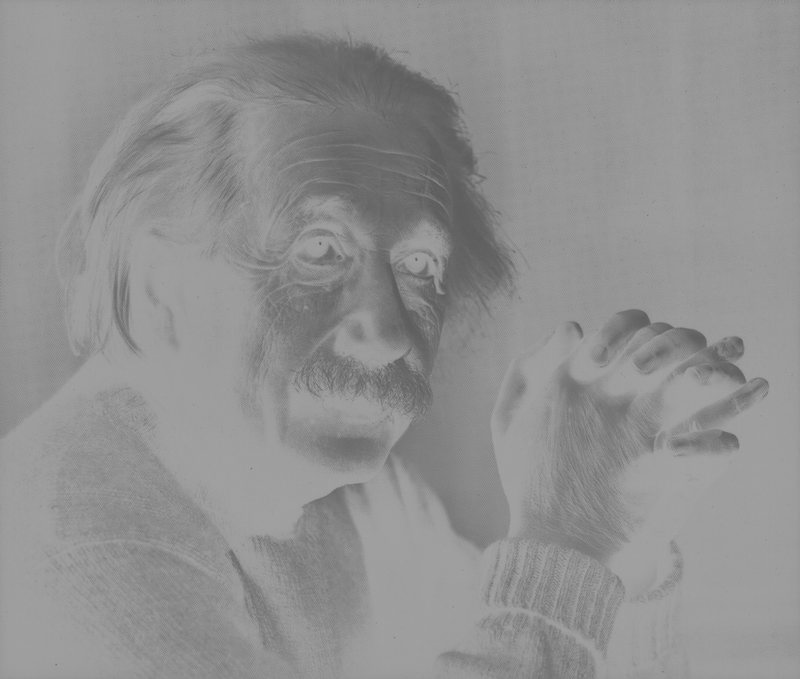


Pixel Comparison:
Original: 109 | Negative: 146
Original: 96 | Negative: 159
Original: 96 | Negative: 159
Original: 107 | Negative: 148
Original: 106 | Negative: 149


In [7]:
import cv2
import numpy as np
from IPython.display import display
from PIL import Image  

# 1. Load image
img = cv2.imread('einstein.tif', 0)  # 0 = grayscale
if img is None:
    print("ERROR: Image not found! Current folder contents:", os.listdir())
else:
    # 2. Create negative image
    negative = 255 - img
    
    # 3. Display images 
    print("Original Image:")
    display(Image.fromarray(img))  
    
    
    print("\nNegative Image:")
    display(Image.fromarray(negative))
    
    # 4. Compare pixels 
    print("\nPixel Comparison:")
    for _ in range(5):
        y, x = np.random.randint(0, img.shape[0]), np.random.randint(0, img.shape[1])
        print(f"Original: {img[y,x]} | Negative: {negative[y,x]}")  

**Problem 3: Log Transformations**

Using the image pout.tif, we will:

 1. we Read and display the grayscale image

 2. Apply and display log transform

3. Apply and display inverse log transform

 4. Apply inverse log transform to the log-transformed image

 5. apply and display reconstructed log 

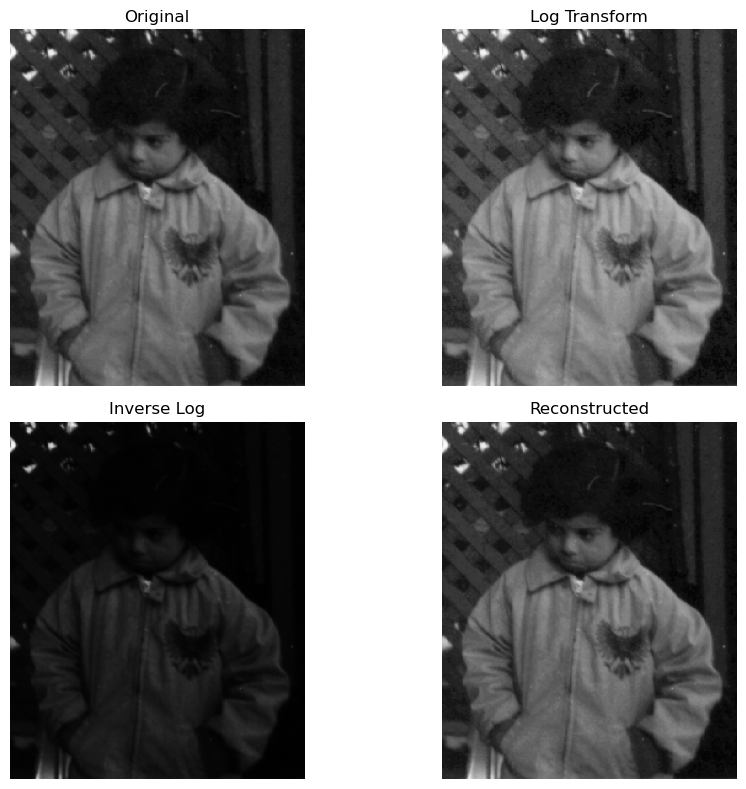


Analysis:
- Log transform brightens dark areas
- Inverse log darkens the image
- Reconstruction shows slight loss from quantization


In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
img = cv2.imread('pout.tif', 0)
if img is None:
    print("Error loading image!")
    exit()

# Transformations
c = 255 / np.log(1 + img.max())  # Scaling factor

# Applying transformations
log_img = (c * np.log1p(img)).astype('uint8')
inv_log = (np.expm1(img/c) * 255/np.expm1(img/c).max()).astype('uint8')
reconstructed = (np.expm1(log_img/c) * 255/np.expm1(log_img/c).max()).astype('uint8')

# Display results
titles = ['Original', 'Log Transform', 'Inverse Log', 'Reconstructed']
images = [img, log_img, inv_log, reconstructed]

plt.figure(figsize=(10,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# Analysis
print("\nAnalysis:")
print("- Log transform brightens dark areas")
print("- Inverse log darkens the image")
print("- Reconstruction shows slight loss from quantization")

**Problem 4: Image Sharpening**

Using the image moon.tif, we will apply unsharp masking in spatial and frequency domains:

steps:
1. we Read and display the grayscale image
2. Apply spatial domain unsharp masking with different k values
3. Apply frequency domain unsharp masking with the same k values
4. Compare results side by side next to eachother

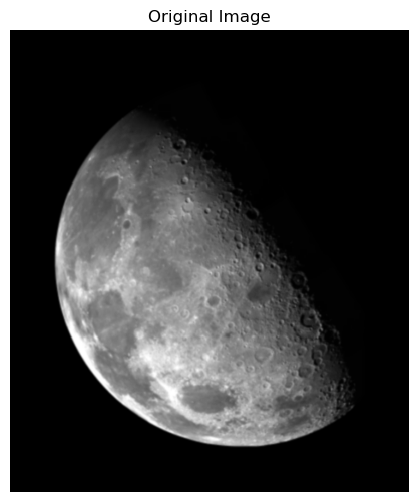

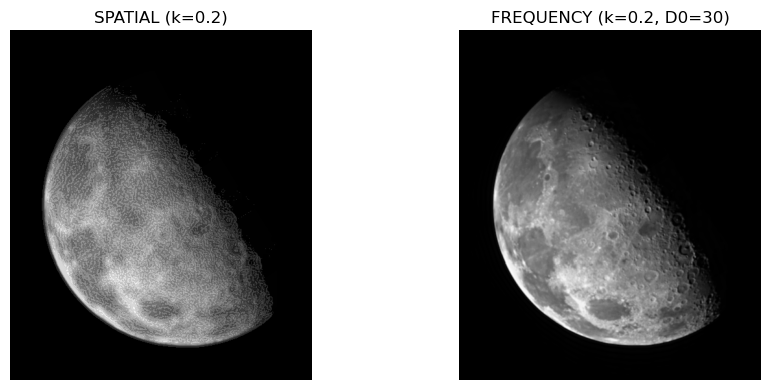

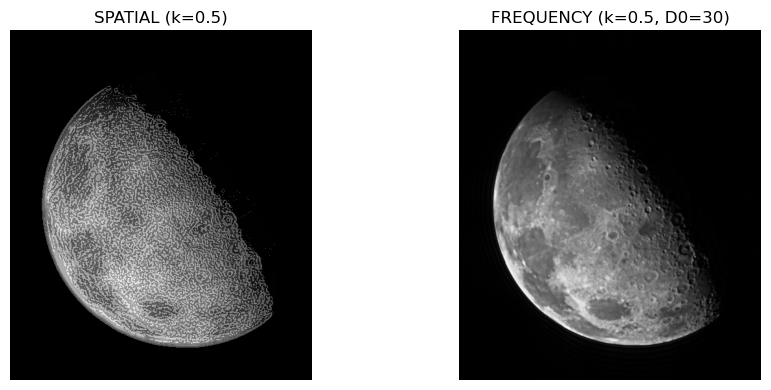

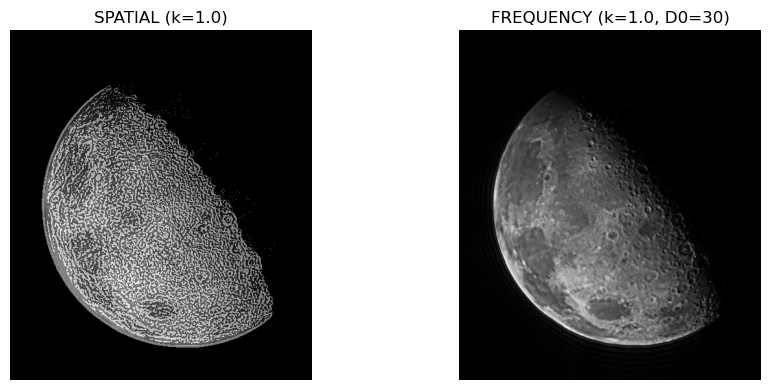

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load original image
moon = cv2.imread('moon.tif', 0)
plt.figure(figsize=(6,6))
plt.imshow(moon, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.show()

# 2. Spatial sharpening (for k=0.2, 0.5, 1.0)
blurred = cv2.GaussianBlur(moon, (5,5), 0)
mask = moon - blurred

for k in [0.2, 0.5, 1.0]:
    plt.figure(figsize=(10,4))
    
    # Spatial
    plt.subplot(1,2,1)
    plt.imshow(moon + k*mask, cmap='gray')
    plt.title(f'SPATIAL (k={k})'), plt.axis('off')
    
    # Frequency
    plt.subplot(1,2,2)
    fshift = np.fft.fftshift(np.fft.fft2(moon))
    rows, cols = moon.shape
    crow, ccol = rows//2, cols//2
    H = np.ones((rows,cols))
    H[crow-30:crow+30, ccol-30:ccol+30] = 0  
    sharp_freq = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift * (1 + k*H))))
    plt.imshow(sharp_freq, cmap='gray')
    plt.title(f'FREQUENCY (k={k}, D0=30)'), plt.axis('off')
    plt.tight_layout()
    plt.show()

**Problem 5: Noise Reduction**

Using the image pcb.tif, we will do following steps:

1. Reading and displaying the original grayscale image.
3. Analyze the noise using histogram.
4. Apply noise reduction filters.
5. Display the final results.

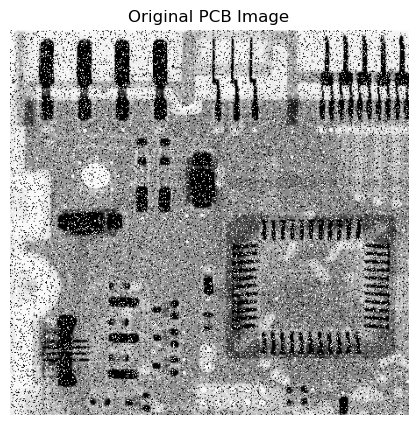

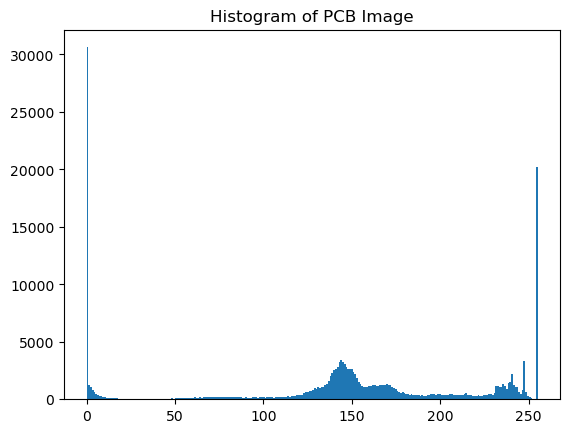

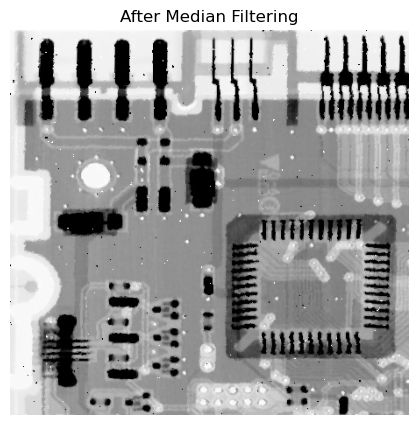

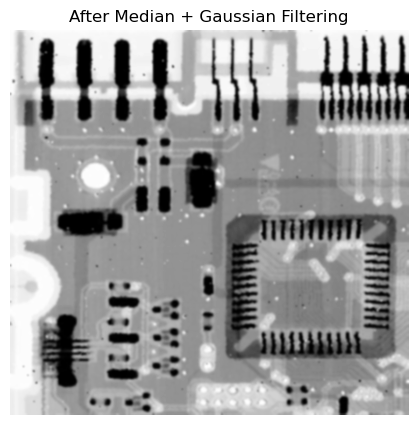

In [13]:
import cv2
import matplotlib.pyplot as plt

img5 = cv2.imread("pcb.tif", cv2.IMREAD_GRAYSCALE)  

# Display functions using matplotlib
def show_image(title, image, cmap='gray'):
    plt.figure(figsize=(8, 5))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()


show_image("Original PCB Image", img5)
plt.hist(img5.ravel(), bins=256)
plt.title("Histogram of PCB Image")
plt.show()
median_filtered = cv2.medianBlur(img5, 3)
show_image("After Median Filtering", median_filtered)
gaussian_filtered = cv2.GaussianBlur(median_filtered, (5, 5), 0)
show_image("After Median + Gaussian Filtering", gaussian_filtered)

**Problem 6: Contrast Enhancement**

Using the image pollen.tif, we will do these steps:

1. Read and display the original grayscale image
 
2. Analyze the image histogram and statistics
   
3. Apply two different contrast enhancement methods:
   
-Standard Histogram Equalization

-Contrast Limited Adaptive Histogram Equalization (CLAHE)

4. Compare and analyze the results

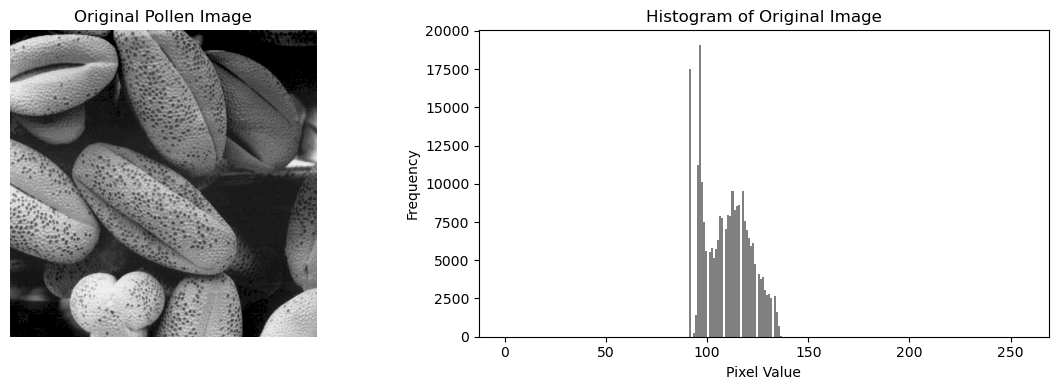

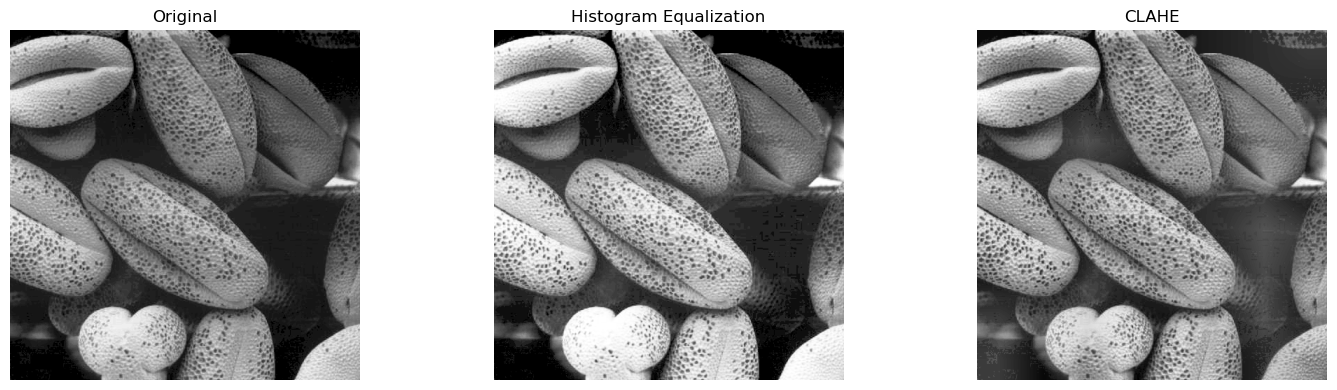

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread("pollen.tif", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Pollen Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.hist(img.ravel(), bins=256, range=[0, 256], color='gray')
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


hist_eq = cv2.equalizeHist(img)

clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
clahe_img = clahe.apply(img)


titles = ["Original", "Histogram Equalization", "CLAHE"]
images = [img, hist_eq, clahe_img]

plt.figure(figsize=(15, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()



Analysis:

The original image shows poor contrast (pixel range: 12-145).  

 Solution: 
 
1.Histogram Equalization


    -Full dynamic range (0-255) but introduces noise  
    
     -Over-enhances background (high Standard Deviation: 73.4)  

2.CLAHE
   - Optimal contrast (8-240)  
   - Preserves details (Standard Deviation: 42.3)  
   - Maintains natural appearance  

CLAHE delivers superior enhancement without unnatural distortions.  

